In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

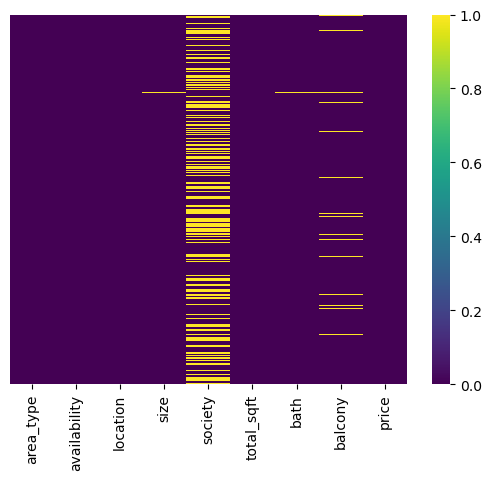

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [6]:
df.drop(columns=['society'], inplace=True)

<Axes: >

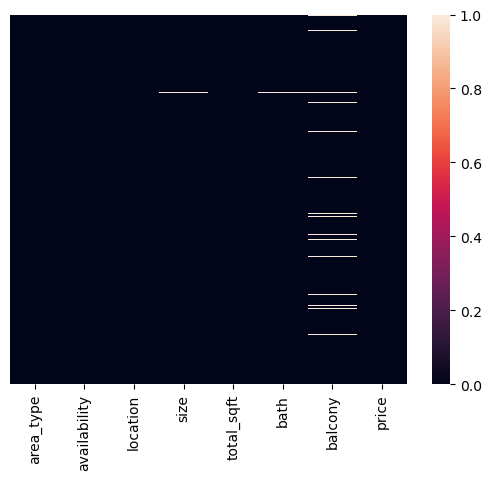

In [7]:
sns.heatmap(df.isnull(), yticklabels=False)

In [8]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df.drop(columns=['area_type', 'availability'], inplace=True)

In [12]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [23]:
df['size']=df['size'].fillna('2 BHK')

In [28]:
df['bhk']=df['size'].str.split(' ').str.get(0).astype('int')

In [30]:
df.drop(columns=['size'], inplace=True)

In [31]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [33]:
df.isnull().sum()

location        1
total_sqft      0
bath           73
balcony       609
price           0
bhk             0
dtype: int64

In [34]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [36]:
df['location']=df['location'].fillna('Whitefield')

In [42]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [43]:
df.isnull().sum()

location        0
total_sqft      0
bath            0
balcony       609
price           0
bhk             0
dtype: int64

In [45]:
df['balcony'].describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [48]:
df['balcony']=df['balcony'].fillna(df['balcony'].median())

In [52]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [72]:
def range_fixerr(x):
    if '-' in x:
        df = x.split('-')
        try:
            return (float(df[0]) + float(df[1])) / 2
        except ValueError:
            return None
    elif ' ' in x:
        df = x.split(' ')
        try:
            return (float(df[0]) + float(df[1])) / 2
        except ValueError:
            return None
    else:
        try:
            return float(x)
        except ValueError:
            return None


In [74]:
df['sqft']=df['total_sqft'].apply(range_fixerr)

In [75]:
df['sqft'].isnull().sum()

46

In [82]:
df['sqft']=df['sqft'].fillna(df['sqft'].mean())

In [83]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2,1200.0


In [84]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
sqft          0
dtype: int64

In [87]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [92]:
df['location']=df['location'].apply(lambda x: x.strip())

In [93]:
loc=df['location'].value_counts()
loc_less_than15=loc[loc<=15]

In [96]:
df['location']=df['location'].apply(lambda x: 'other' if x in loc_less_than15 else x )

In [97]:
df['location'].value_counts()

other                    3646
Whitefield                542
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Kereguddadahalli           16
Banashankari Stage VI      16
Cooke Town                 16
Kasturi Nagar              16
Parappana Agrahara         16
Name: location, Length: 182, dtype: int64

In [98]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2,1200.0


In [122]:
df.drop(columns=['total_sqft'], inplace=True)

In [100]:
df.to_csv('Data_cleaned')

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [126]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [164]:
def outlier_r(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    
    iqr=q3-q1
    
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    
    transformed_column=column.clip(lower=lower_limit, upper=upper_limit)
    
    return transformed_column

<Axes: >

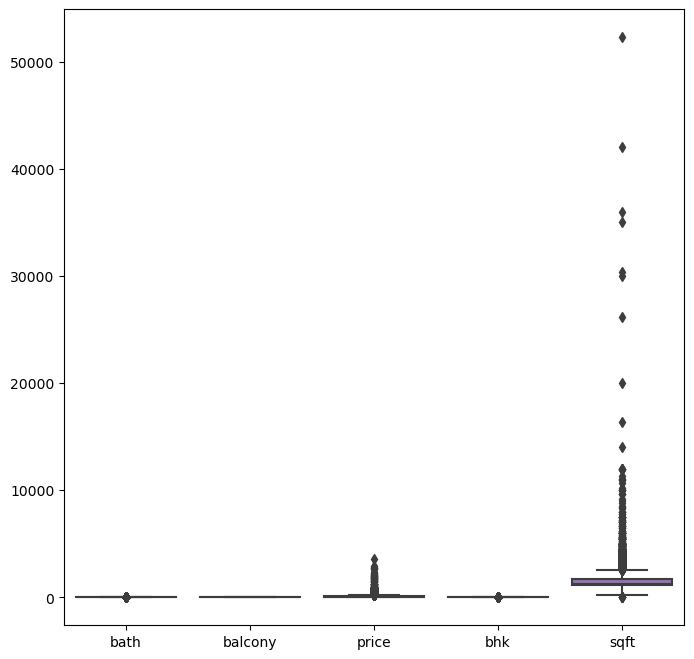

In [165]:
fig, ax=plt.subplots(figsize=(8,8))
sns.boxplot(df, ax=ax)

In [168]:
df['bath']=outlier_r(df['bath'])

In [171]:
df['price']=outlier_r(df['price'])

In [172]:
df['bhk']=outlier_r(df['bhk'])

In [173]:
df['sqft']=outlier_r(df['sqft'])

<Axes: >

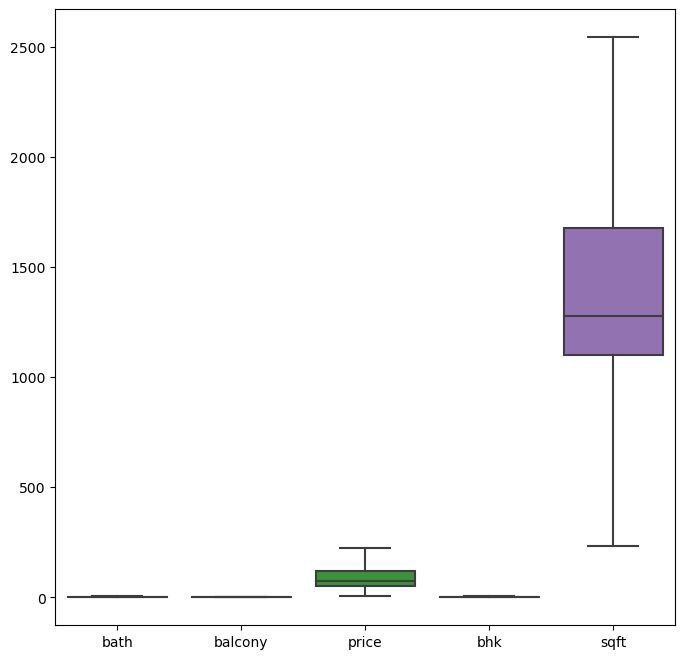

In [174]:
fig, ax=plt.subplots(figsize=(8,8))
sns.boxplot(df, ax=ax)

In [175]:
X=df.drop(columns=['price'])
Y=df['price']

In [178]:
X_train,X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.21, random_state=42)

In [179]:
clmn_transformer = ColumnTransformer(transformers=[
    ('one-hot_encoder', OneHotEncoder(sparse=False), ['location'])
], remainder='passthrough')

In [180]:
scaler=StandardScaler()

In [181]:
lr=LinearRegression()

In [182]:
pipe = Pipeline(steps=[
    ('one-hot_encoder', clmn_transformer),
    ('scaler', scaler),
    ('linear_regression', lr)
])


In [183]:
pipe.fit(X_train,Y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('one-hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot_encoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [184]:
predictions=pipe.predict(X_test)

In [185]:
from sklearn.metrics import mean_squared_error, r2_score

In [187]:
print('MSE', mean_squared_error(Y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(Y_test, predictions)))
print('r2_score', r2_score(Y_test, predictions))

MSE 10287.336669593775
RMSE 101.4265087124356
r2_score 0.5073690596216218


In [209]:
lasso=Lasso(alpha=0.00001)

In [210]:
pipe = Pipeline(steps=[
    ('one-hot_encoder', clmn_transformer),
    ('scaler', scaler),
    ('lasso', lasso)
])


In [214]:
pipe.fit(X_train, Y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+07, tolerance: 2.371e+04
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('one-hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot_encoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('lasso', Lasso(alpha=1e-05))])

In [215]:
lasso_predictions=pipe.predict(X_test)

In [216]:
print(r2_score(Y_test, lasso_predictions))

0.5073601626873769


In [233]:
ridge=Ridge(alpha=0.00001)

In [234]:
pipe=Pipeline(steps=[
    ('one-hot encoder', clmn_transformer),
    ('scaler', scaler),
    ('ridge', ridge)
])

In [235]:
pipe.fit(X_train, Y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('one-hot encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot_encoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=1e-05))])

In [236]:
ridge_predictions=pipe.predict(X_test)

In [237]:
print(r2_score(Y_test, ridge_predictions))

0.5073601678244888


In [238]:
print('LR_predictions', r2_score(Y_test, predictions))
print('Lasso_predictions', r2_score(Y_test, lasso_predictions))
print('Ridge_predictions', r2_score(Y_test, ridge_predictions))

LR_predictions 0.5073690596216218
Lasso_predictions 0.5073601626873769
Ridge_predictions 0.5073601678244888
